### Katarina - Intäkter per månad/ vecka

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

In [2]:
import pandas as pd
import metrics as M
import viz as V
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("../data/ecommerce_sales.csv", parse_dates=["date"])

In [4]:
print("Intäkter per månad:")
display(M.revenue_month(df))

Intäkter per månad:


,month,revenue
0,2024-01,664083.32
1,2024-02,548462.03
2,2024-03,487602.00
3,2024-04,580194.83
4,2024-05,632165.16
5,2024-06,590259.89


In [5]:
print("Intäkter per vecka (sorterad):")
display(M.sorted_weeks(df))

Intäkter per vecka (sorterad):


,week,revenue
22,2024-06-03/2024-06-09,166384.34
3,2024-01-22/2024-01-28,165832.80
0,2024-01-01/2024-01-07,161119.04
15,2024-04-15/2024-04-21,157775.20
20,2024-05-20/2024-05-26,156746.92
2,2024-01-15/2024-01-21,147225.11
14,2024-04-08/2024-04-14,146409.48
21,2024-05-27/2024-06-02,144516.63
25,2024-06-24/2024-06-30,142431.78
17,2024-04-29/2024-05-05,140330.00


Graf för intäkt per månad:


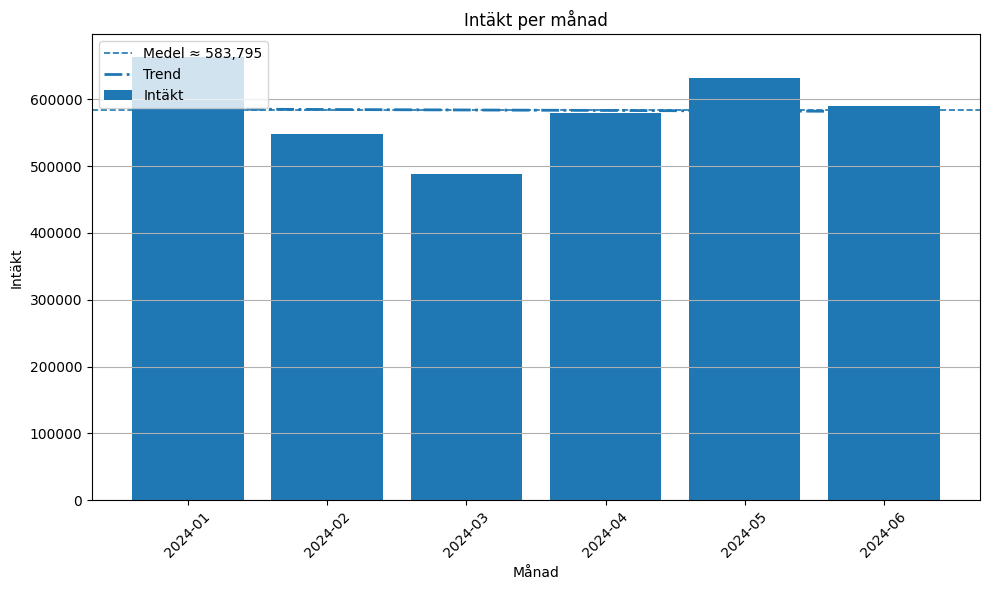

Graf för intäkt per vecka:


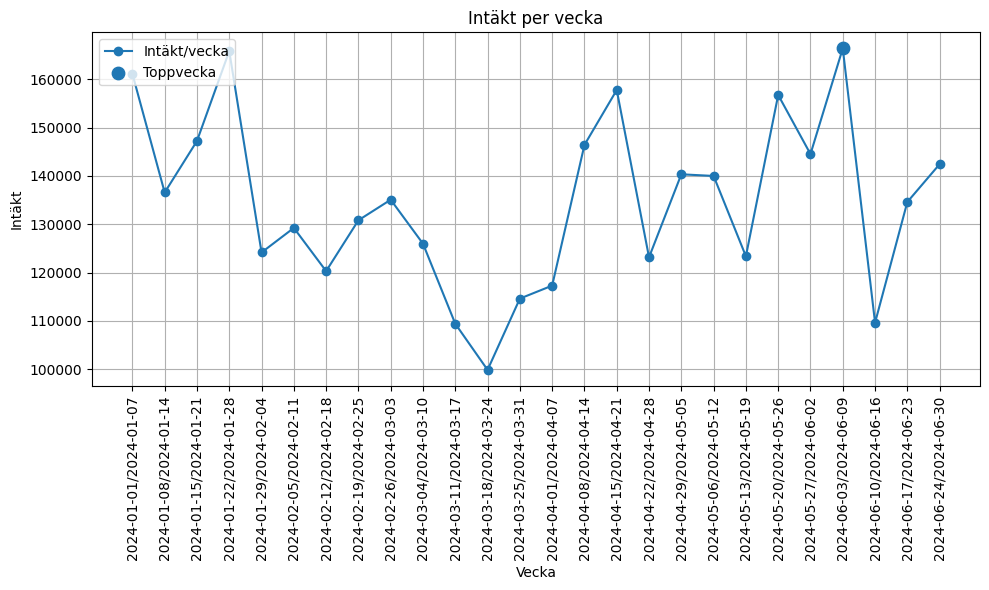

In [6]:
print("Graf för intäkt per månad:")
V.plot_revenue_month(df)

print("Graf för intäkt per vecka:")
V.plot_revenue_week(df)

Magdalena - Försäljning per stad

In [7]:
by_city = M.revenue_per_city(df)
by_cat = M.top_categorys(df)
by_city
by_cat.head(3) # Top 3 kategorier

,category,revenue
0,Electronics,1364228.07
1,Sports,734653.42
2,Clothing,586744.91


<Axes: title={'center': 'Intäkt per kategori'}, xlabel='Kategori', ylabel='Intäkt i miljoner'>

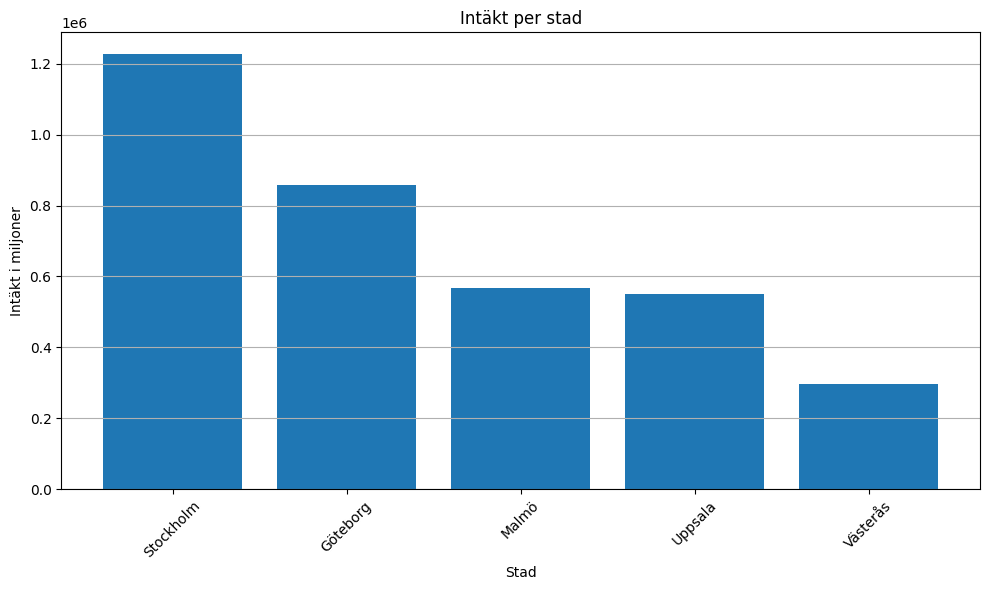

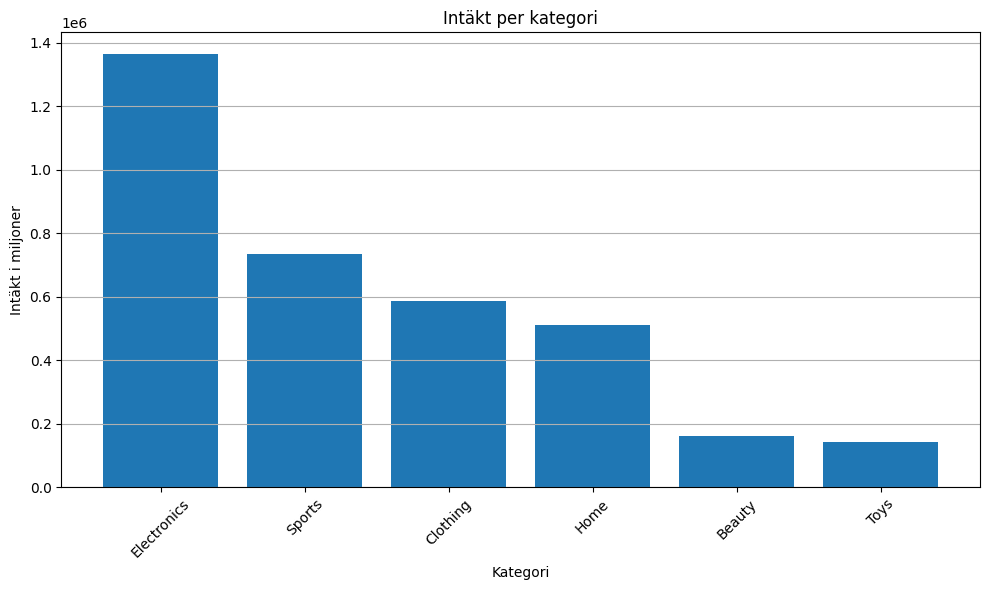

In [8]:
# Intäkt per stad
fig, ax = plt.subplots(figsize=(10, 6)) # skapar en graf med sepererade staplar för varje stad
V.bar(ax, by_city["city"], by_city["revenue"], "Intäkt per stad", "Stad", "Intäkt i miljoner")

# Intäkt per kategori
fig, ax = plt.subplots(figsize=(10, 6)) # skapar en graf med sepererade staplar för varje stad
V.bar(ax, by_cat["category"], by_cat["revenue"], "Intäkt per kategori", "Kategori", "Intäkt i miljoner")



# Kevin - AOV

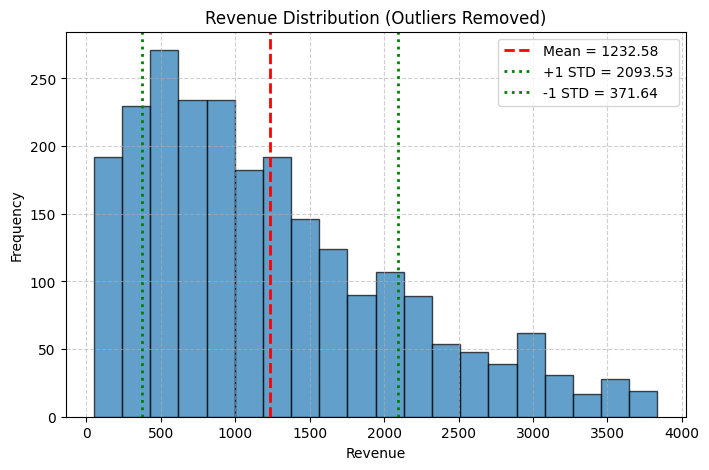

In [9]:

df = pd.read_csv("../data/ecommerce_sales.csv")

np_orders = np.array(df.revenue)

q1 = np.percentile(np_orders, 25)
q3 = np.percentile(np_orders, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_orders = np_orders[(np_orders >= lower_bound) & (np_orders <= upper_bound)]

std = np.std(filtered_orders)

mean = np.mean(filtered_orders)

plt.figure(figsize=(8, 5))
plt.hist(filtered_orders, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean:.2f}")
plt.axvline(mean + std, color='green', linestyle='dotted', linewidth=2, label=f"+1 STD = {mean + std:.2f}")
plt.axvline(mean - std, color='green', linestyle='dotted', linewidth=2, label=f"-1 STD = {mean - std:.2f}")

plt.title("Revenue Distribution (Outliers Removed)")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Rekomendationer när det gäller intäkter per månad/vecka:

- Tänk på en stark marknadsföring under januari och maj. Dessa månader visar redan höga intäkter och har potential att generera ännu större omsättning.

- Fundera över åtgärder för att motverka nedgången i mars, (kanske kampanjer eller rabatter) för att jämna ut intäktsnivåerna. 

- Fortsätt analysera och jobba med veckoresultaten för att få fram och identifera återkommande veckor med toppar/dalar och anpassa bemanning och lager därefter för maximal effektivitet och besparing. 

## Jan - Eventuella Avvikelser:


Per stad:


,city,revenue,deviation
0,Göteborg,859019.65,Normal
1,Malmö,567926.32,Normal
2,Stockholm,1227201.94,Hög
3,Uppsala,551478.42,Normal
4,Västerås,297140.90,Låg


np.float64(567926.32)

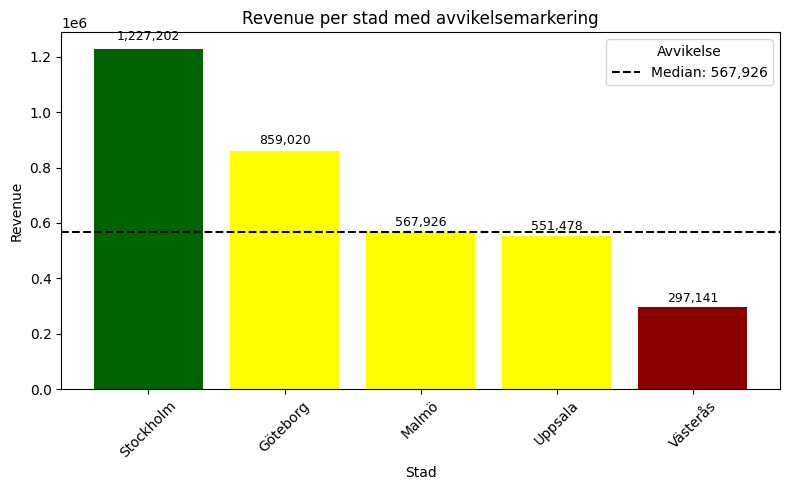

In [10]:
print("Per stad:")
revenue_per_city, median_revenue = M.revenue_per_city_dev(df)
display(revenue_per_city)
display(median_revenue)
V.plot_city_revenue(revenue_per_city, median_revenue)
#Markerat städer som sticker ut mer än 30% från genomsnittet(Låg och hög)

In [11]:
df["date"] = pd.to_datetime(df["date"])  # säkerställ att det är datetime-format
df["month"] = df["date"].dt.to_period("M").astype(str)

df = M.add_month_column(df)
grouped = M.sales_per_cat(df, calc_change=True)

print(grouped)
#Visar försäjlning per kategori per månad och om försäjlningen minskar eller ökar i %.

       category    month    revenue  change_pct
0        Beauty  2024-01   36266.24         NaN
1        Beauty  2024-02   17229.40  -52.491904
2        Beauty  2024-03   29048.02   68.595656
3        Beauty  2024-04   21218.72  -26.952956
4        Beauty  2024-05   26728.58   25.966976
5        Beauty  2024-06   32563.01   21.828432
6      Clothing  2024-01  105282.27         NaN
7      Clothing  2024-02   75706.91  -28.091492
8      Clothing  2024-03   75064.45   -0.848615
9      Clothing  2024-04  121692.91   62.117900
10     Clothing  2024-05  116598.19   -4.186538
11     Clothing  2024-06   92400.18  -20.753332
12  Electronics  2024-01  320974.28         NaN
13  Electronics  2024-02  294814.45   -8.150133
14  Electronics  2024-03  171967.59  -41.669213
15  Electronics  2024-04  167009.99   -2.882869
16  Electronics  2024-05  197994.91   18.552734
17  Electronics  2024-06  211466.85    6.804185
18         Home  2024-01   65401.53         NaN
19         Home  2024-02   66959.10    2

In [12]:

df["date"] = pd.to_datetime(df["date"])  # säkerställ att det är datetime-format
df["month"] = df["date"].dt.to_period("M").astype(str)
sales = M.sales_per_cat(df, calc_change=True)
sales = M.detect_sales_anomalies(sales)

df = M.sales_per_cat(df)
sales_outliers= sales[sales["anomaly"] != "Normal"] #visar de kategorier som har ökat eller minskat kraftigt(månadsvis,jamfört med månaden innan)
print(sales_outliers)


       category    month    revenue  change_pct            anomaly
1        Beauty  2024-02   17229.40  -52.491904  Kraftig minskning
2        Beauty  2024-03   29048.02   68.595656     Kraftig ökning
9      Clothing  2024-04  121692.91   62.117900     Kraftig ökning
14  Electronics  2024-03  171967.59  -41.669213  Kraftig minskning
25       Sports  2024-02   68657.21  -41.618674  Kraftig minskning
26       Sports  2024-03  104392.21   52.048430     Kraftig ökning
27       Sports  2024-04  141835.03   35.867446     Kraftig ökning
31         Toys  2024-02   25094.96   35.226817     Kraftig ökning
34         Toys  2024-05   19219.65  -38.457516  Kraftig minskning


In [13]:
df = pd.read_csv("../data/ecommerce_sales.csv")
antal_hög_unite, antal_låg_unite, df_large_orders = M.order_controll(df, column="units")

print(f"Antal order med hög unit värde: {antal_hög_unite}")
print(f"Antal order med låg unit värde: {antal_låg_unite}")
print("Ordrarna med väldigt många units:")
display(df_large_orders)

Antal order med hög unit värde: 7
Antal order med låg unit värde: 381
Ordrarna med väldigt många units:


,order_id,date,city,category,price,units,revenue
88,100088,2024-04-13,Uppsala,Clothing,685.03,8,5480.24
338,100338,2024-04-07,Stockholm,Sports,447.66,8,3581.28
675,100675,2024-04-17,Stockholm,Sports,696.35,8,5570.80
1545,101545,2024-02-19,Malmö,Clothing,244.88,8,1959.04
1786,101786,2024-01-05,Uppsala,Clothing,435.69,8,3485.52
2256,102256,2024-06-15,Stockholm,Toys,198.60,9,1787.40
2259,102259,2024-05-16,Stockholm,Clothing,65.93,8,527.44


In [14]:
mean_price, antal_små_ordar = M.price_order(df, column="price")
print(f"Genomsnittet av kategorien price: {mean_price}")
print(f"Antalet ordar med pris som ligger under genomsnittet: {antal_små_ordar}")


Genomsnittet av kategorien price: 476.213212
Antalet ordar med pris som ligger under genomsnittet: 1496


In [15]:
median_revenue, liten_revenue, count_avg = M.revenue_order(df, column="revenue")



df_little_revenue = df[df["revenue"] < 100]
#Visar en genomsnitt av revenue samt de som har mindre än genomsnitt och de som är extrem låga (100)
print(f"Medianen av revenue {median_revenue}")
print(f"Antalet ordar som är mindre än medianen: {count_avg}")
print("Ordrar som har extremt låg revenue: ")
print(df_little_revenue)

Medianen av revenue 1088.69
Antalet ordar som är mindre än medianen: 1250
Ordrar som har extremt låg revenue: 
      order_id        date       city     category  price  units  revenue
18      100018  2024-03-24  Stockholm         Toys  76.41      1    76.41
139     100139  2024-03-04      Malmö  Electronics  50.00      1    50.00
152     100152  2024-04-29      Malmö         Home  53.88      1    53.88
219     100219  2024-02-15    Uppsala         Toys  85.57      1    85.57
240     100240  2024-04-02  Stockholm         Toys  59.91      1    59.91
548     100548  2024-06-30   Göteborg         Home  50.00      1    50.00
825     100825  2024-01-18  Stockholm     Clothing  81.87      1    81.87
978     100978  2024-06-04  Stockholm  Electronics  92.52      1    92.52
980     100980  2024-02-13      Malmö         Toys  50.00      1    50.00
995     100995  2024-06-20   Göteborg         Home  75.65      1    75.65
1126    101126  2024-03-06    Uppsala  Electronics  50.00      1    50.00
1

Revenue per månad month
2024-01    664083.32
2024-02    548462.03
2024-03    487602.00
2024-04    580194.83
2024-05    632165.16
2024-06    590259.89
Freq: M, Name: revenue, dtype: float64


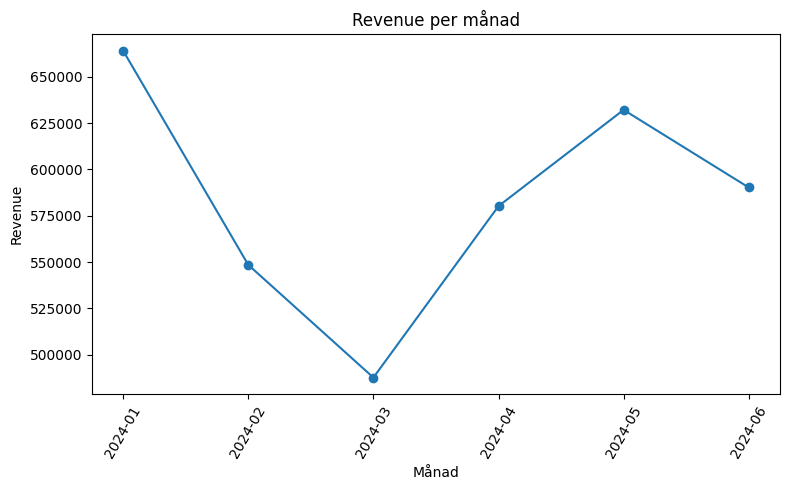

In [16]:
df["date"] = pd.to_datetime(df["date"])  # säkerställ att det är datetime-format
df["month"] = df["date"].dt.to_period("M")

monthly_revenue = M.month_revenue(df, column="month")
print(f"Revenue per månad {monthly_revenue}")

V.plot_monthly_revenue(monthly_revenue)


## Jan - Observationer:
-  Vid analys av omsättning per stad ser man tydligt att Stockholm ligger över 30% över genomsnittet. Göteborg, Malmö och Uppsala ligger inom den vanliga gränsen. Västerås har en negativ/låg avvikelse med mer än 30% mindre än genomsnittet.
- Analysen visar tydligt hur efterfrågan varierar mellan de olika kategorierna. Kategorien "Beauty" minskar krafitgt i februari (-52%) men ökar kraftigt i Mars (+68%). Electronics kategorien visar en stor nedgång i Mars med (-41%) medan Clothing och Sports kategorien ökar kraftigt under våren.
- Analysen visar att några ordrar har ovanligt hög units värde (>7), vilket gör dem tyligt större än genomsnittet. Det finns flera ordar med mycket låg omsättning,ofta under 100 kr jamfört med medianen på cirka 1089 kr. Priserna i sig verkar stabila mellan kategorierna.
- I analysen av "Revenue per månad" hittar man inga konsithgeter dvs inga hopp eller extrem stora skillnader mellan månaderna dock så är revenuen lägst i månaden Mars 